### Reverse words in a char sequence

In [319]:
def rev(s):
    b, e = 0, 0
    
    for i in range(len(s)):
        c = s[i]
        
        if c != " " and i+1 != len(s):
            e+=1
            continue
        
        if i+1 == len(s):
            e += 1

        for j in range((e-b)//2):
            s[b+j], s[e-1-j]=s[e-1-j], s[b+j]
        
        e += 1
        b = e
        i = e
    return s
rev(list("I love Cars"))

['I', ' ', 'e', 'v', 'o', 'l', ' ', 's', 'r', 'a', 'C']

##### https://www.hackerrank.com/challenges/array-left-rotation/forum

In [320]:
def leftRotate(A, d):
    
    n = len(A)
    B = list(range(n))

    for i in range(n):
        #print((i+n-d)%n)
        B[(i+n-d)%n] = A[i]
    return B

A = [1,2,3,4,5]
leftRotate(A, 2)

[3, 4, 5, 1, 2]

In [321]:
def reverse_helper(prev, current):
    if not current:
        return prev
    head = reverse_helper(current, current.next)
    current.next = prev
    return head
    
def Reverse(head):
    print("-")
    n = reverse_helper(head, head.next)
    head.next = None
    return n

def printList(h):
    if not h:
        return
    print(h.data)
    printList(h.next)
    
class Node(object):

    def __init__(self, data=None, next_node=None):
        self.data = data
        self.next = next_node
h = Node(1, Node(2, Node(3, Node(4))))
printList(h)
printList(Reverse(h))


1
2
3
4
-
4
3
2
1


In [322]:
def flatten(array, output=None):
    if output is None:
        output = []
    for i in array:
        if isinstance(i, (list)):
            flatten(i, output)
        else:
            output.append(i)
    return output

In [323]:
r = []


In [324]:
a = [[1,2,[3]],4,[[[7,[9]]]]]
assert flatten(a) == [1, 2, 3, 4, 7, 9]

a = []
assert flatten(a) == []

a = [3]
assert flatten(a) == [3]

a = [{"name": "mustafa"}, [2, 3]]
assert flatten(a) == [{"name": "mustafa"}, 2, 3]

a = [[[[[[]]]]]]
assert flatten(a) == []

https://www.careercup.com/question?id=5664081785651200

Given arrays for N (>= 2) users, each representing the IDs of hotels visited, find the common IDs of the hotels visited amongst the users. 

Input: 

* userA = { 2, 3, 1 } 
* userB = { 2, 5, 3 } 
* userC = { 7, 3, 1 } 

Output: 
{3} 

Assumptions: 
Arrays are unsorted. 

Cases: 
1. Each array consists of distinct hotel IDs 
2. Each array may contain duplicate hotel IDs

#### Python solution:

In [325]:
def find_common_user_hotels(user_hotels):
    common = user_hotels[0][:]
    for i in range(1, len(user_hotels)):
        uh = user_hotels[i]
        for c in common:
            if c not in uh: # lookup - uh can be converted to map for fast searching
                common.remove(c)
    return common

def find_common_user_hotels_2(user_hotels):
    common = user_hotels[0][:]
    for i in range(1, len(user_hotels)):
        uh = dict((j, True) for j in user_hotels[i])
        for c in common:
            if c not in uh:
                common.remove(c)
    return common

find_common_user_hotels_2([
    [2, 3, 1],
    [2, 5, 3],
    [7, 3, 1]
])

[3]

#### Java solution:

```java
public static void main(String[] args) {
    List<List<Integer>> userHotels = new ArrayList<>();
    userHotels.add(new ArrayList<>(Arrays.asList(2, 3, 1)));
    userHotels.add(new ArrayList<>(Arrays.asList(2, 5, 3)));
    userHotels.add(new ArrayList<>(Arrays.asList(7, 3, 1)));
    findCommonUserHotels(userHotels).forEach(System.out::println);
}

private static List<Integer> findCommonUserHotels(List<List<Integer>> userHotels) {
    List<Integer> common = userHotels.get(0);
    List<Integer> uh;

    for (int i = 1; i < userHotels.size(); i++) {
        uh = userHotels.get(i);
        for (int j = 0; j < common.size(); j++) {
            if (!uh.contains(common.get(j))) {
                common.remove(j);
                j--;
            }
        }
    }
    return common;
}
private static List<Integer> findCommonUserHotels2(List<List<Integer>> userHotels) {
    List<Integer> common = userHotels.get(0);
    Set<Integer> uh;

    for (int i = 1; i < userHotels.size(); i++) {
        uh = new HashSet<>(userHotels.get(i));
        for (int j = 0; j < common.size(); j++) {
            if (!uh.contains(common.get(j))) {
                common.remove(j);
                j--;
            }
        }
    }
    return common;
}
```

### Search Hotels by keywords

https://www.careercup.com/question?id=5689420884738048

Problem statement 
Given a set of hotels and its guests reviews, sort the hotels based on a list of words specified by a user. The criteria to sort the hotels should be how many times the words specified by the user is mentioned in the hotel reviews. 

Input 
The first line contains a space-separated set of words which we want to find mentions in the hotel reviews. 
The second line contains one integer M, which is the number of reviews. 
This is followed by M+M lines, which alternates an hotel ID and a review belonging to that hotel. 

Output 
A list of hotel IDs sorted, in descending order, by how many mentions they have of the words specified in the input. If the count is same, sort according to the hotel IDs in ascending order.

In [326]:
import operator
def search_hotesl(keywords, hotels):
    results = []
    for h in hotels:
        h_words = dict((w, True) for w in h[1].split(" "))
        count = sum(1 for k in keywords if k in h_words)
        if count > 0:
            results.append({
                "id": h[0],
                "count": count
            })
    
    def compare(a, b):
        if a["count"] == b["count"]:
            return cmp(b["id"], a["id"])
        else:
            return cmp(a["count"], b["count"])

    return sorted(results, cmp=compare, reverse=True)

search_hotesl(keywords=["cheap", "center", "view"], hotels=[
    (7, 'price is too expensive'),
    (3, 'cheap in the city center'),
    (8, 'cheap but far'),
    (4, 'good view in the city center and cheap'),
    (5, 'cheap in the heart of the city center'),
    (2, 'not expensive in the city')
])


[{'count': 3, 'id': 4},
 {'count': 2, 'id': 3},
 {'count': 2, 'id': 5},
 {'count': 1, 'id': 8}]

#### Java solution:
```java
public static void main(String[] args) {
    List<List> hotels = new ArrayList<>();

    hotels.add(new ArrayList<>(Arrays.asList(7, "price is too expensive")));
    hotels.add(new ArrayList<>(Arrays.asList(3, "cheap in the city center")));
    hotels.add(new ArrayList<>(Arrays.asList(8, "cheap but far")));
    hotels.add(new ArrayList<>(Arrays.asList(4, "good view in the city center and cheap")));
    hotels.add(new ArrayList<>(Arrays.asList(5, "cheap in the heart of the city center")));
    hotels.add(new ArrayList<>(Arrays.asList(2, "not expensive in the city")));
    List<String> keywords = Arrays.asList("cheap", "center", "view");
    searchHotels(hotels, keywords).forEach(System.out::println);
}

private static List<List> searchHotels(List<List> hotels, List<String> keywords) {
    List<List> results = new ArrayList<>();
    Integer id, count;
    Set<String> hotelKeywords;

    for (List hotel : hotels) {
        id = (Integer) hotel.get(0);
        count = 0;
        hotelKeywords = new HashSet<>(Arrays.asList(hotel.get(1).toString().split(" ")));
        for (String keyword : keywords) {
            if (hotelKeywords.contains(keyword))
                count++;
        }

        if (count > 0)
            results.add(Arrays.asList(id, count));
    }

    results.sort((o1, o2) -> {
        int c = Integer.valueOf((int) o2.get(1)).compareTo((int) o1.get(1));
        if (c == 0)
            return Integer.valueOf((int) o1.get(0)).compareTo((int) o2.get(0));
        else
            return c;
    });
    return results;
}

```

### find max staying guests
https://www.careercup.com/question?id=5647860910522368

Consider a hotel where the guest is checked in and check out. Find a day when the maximum number of guests stay in a hotel. 

example: 

Input : 
[

* . {check-in : 1, check-out 4},
* . {check-in : 2, check-out 5}, 
* . {check-in : 10, check-out 12}, 
* . {check-in : 5, check-out 9}, 
* . {check-in : 5, check-out 12} 

]

Output : 5



In [327]:
def findMaxStayingGuests(stayings):
    days = {}
    m = None
    for s in stayings:
        for i in range(s["check-in"], s["check-out"]+1):
            days[i] = days.get(i, 0) + 1
            if m is None or days[i] > days[m]:
                m = i
    return m

findMaxStayingGuests([
    {"check-in" : 1, "check-out": 4},
    {"check-in" : 2, "check-out": 5}, 
    {"check-in" : 10, "check-out": 12}, 
    {"check-in" : 5, "check-out": 9}, 
    {"check-in" : 5, "check-out": 12}
])

5

#### Java solution

```java
public static void main(String[] args) {
    List<List<Integer>> stayings = new ArrayList<>();

    stayings.add(new ArrayList<>(Arrays.asList(1, 4)));
    stayings.add(new ArrayList<>(Arrays.asList(2, 5)));
    stayings.add(new ArrayList<>(Arrays.asList(10, 12)));
    stayings.add(new ArrayList<>(Arrays.asList(5, 9)));
    stayings.add(new ArrayList<>(Arrays.asList(5, 12)));

    System.out.println(findMaxDayOfGuests(stayings));
}

private static Integer findMaxDayOfGuests(List<List<Integer>> stayings) {
    Map<Integer, Integer> days = new HashMap<>();
    Integer day = null;
    for (List<Integer> staying : stayings) {
        for (int i = staying.get(0); i < staying.get(1)+1; i++) {
            days.put(i, days.getOrDefault(i, 0) + 1);
            if (day == null || days.get(i) > days.get(day))
                day = i;
        }
    }
    return day;
}
```

### perfect square number sum

https://www.careercup.com/question?id=5739532692488192

Given number N, Find the least number of perfect square number sum needed to get N. 

Example : 
* n=5 (4+1) i.e. 2 
* n=7 (4+1+1+1) i.e. 4 
* n=12 (4+4+4) i.e 3 
* n=20 (16+4) i.e. 2



In [328]:
import math
def least_perfect_squares(n):
    numbers = []
    while n:
        i = int(math.sqrt(n))
        n = n - (i**2)
        numbers.append(i)
    return numbers

print(least_perfect_squares(5))
print(least_perfect_squares(7))
print(least_perfect_squares(12))
print(least_perfect_squares(20))
print(least_perfect_squares(117))

[2, 1]
[2, 1, 1, 1]
[3, 1, 1, 1]
[4, 2]
[10, 4, 1]


### count every word in stream
https://www.careercup.com/question?id=5730652642082816

Given a stream of characters (e.g. acacabcatghhellomvnsdb) and a list of words (e.g. ["aca","cat","hello","world"] ) find and display count of each and every word once the stream ends.(Like : "aca" : 2 , "cat" : 1 , "hello" : 1 , "world" : 0 ).

In [329]:
def count_words(words, text):
    words = dict((w, 0) for w in words)
    for w in words:
        p = -1
        while True:
            p = text.find(w, p+1)
            if p != -1:
                words[w] += 1;
            else:
                break
    return words


def count_words2(words, text):
    s = max(len(w) for w in words)
    words = dict((w, 0) for w in words)
    for i in range(s, len(text)):
        for j in range(s, 0, -1):
            w = text[i-s:i-j+1]
            if w in words:
                words[w] += 1
    return words

print(count_words2(["aca","cat","hello","world"], "acacabcatghhellomvnsdb"))

{'world': 0, 'aca': 2, 'hello': 1, 'cat': 1}


In [330]:
%timeit count_words2(["aca","cat","hello","world"], "acacabcatghhellomvnsdbacacabcatghhellomvnsdbacacabcatghhellomvnsdb")

The slowest run took 4.81 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 79.5 µs per loop


In [331]:
%timeit count_words(["aca","cat","hello","world"], "acacabcatghhellomvnsdbacacabcatghhellomvnsdbacacabcatghhellomvnsdb")

100000 loops, best of 3: 7.46 µs per loop


### is text balanced?
https://www.careercup.com/question?id=5701630857052160

Write a function to test if the given set of brackets are balanced or not. e.g. 

`{{}}{)([][]`



In [332]:
def isBalanced(text):
    symbols = {
        "(": ")", 
        "[": "]", 
        "{": "}"}

    stack = []
    for c in text:
        if c in symbols:
            stack.append(c)
        else:
            if len(stack) == 0 or symbols[stack.pop()] != c:
                return False
    return len(stack) == 0
print(isBalanced("[]()"))
print(isBalanced("]"))
print(isBalanced("[{[([])]}]"))
print(isBalanced("[]({[]})"))
print(isBalanced("[](]"))

True
False
True
True
False


### Compressing String

https://www.careercup.com/question?id=5654760935915520

There's a very simple compression algorithm that takes subsequent characters and just emits how often they were seen. 

Example: 
aaabccddd

output:
a3bc2d3

In [333]:
def compress(t):
    s = t[0]
    c = 1
    i = 1
    sb = []
    while i < len(t):
        if t[i] == s:
            c += 1

        if t[i] != s:
            sb.append(s + str(c) if c > 1 else s)
            s = t[i]
            c = 1
        i+=1
        if i == len(t):
            sb.append(s + str(c) if c > 1 else s)
            
    return "".join(sb)

def decompress(t):
    sb = []
    s = None
    c = 0
    j = 0
    while j < len(t): 
        i = t[j]

        if s is None: 
            s = i
        elif s!=i or j+1==len(t):
            if ord("1") <= ord(i) <= ord("9"):
                sb.append(s*int(i))
                j+=1
            else:
                sb.append(s)
        
            if j < len(t):
                s = t[j]
        j += 1
        if j == len(t):
            sb.append(s)
        
    return "".join(sb)
            
print(compress("aaabccdddr"))
print(decompress("a3bc2d3r"))

a3bc2d3r
aaabccdddr


### find square roots in another list
https://www.careercup.com/question?id=5203402797613056

``` 
$a = [3, 1, 4, 5, 19, 6];
```

``` 
$b = [14, 9, 22, 36, 8, 0, 64, 25];
```

```
# Some elements in the second array are squares. 
# Print elements that have a square root existing in the first array. 
# $b[1] = 9, it’s square root is 3 ($a[0]) 
# $b[3] = 36, it’s square root is 6 ($a[5]) 
# $b[7] = 25, it’s square root is 5 ($a[3]) 
```

```
# Result: 
# 9 
# 36 
# 25
```

In [334]:
def find_squares(a, b):
    
    if len(a) > len(b):
        aLonger = True
        a = dict((i, True) for i in a)
        c = b
    else:
        aLonger = False
        b = dict((i, True) for i in b)
        c = a
    
    result = []
    
    for i in c:

        if aLonger and math.sqrt(i) in a:
            result.append(i)
        elif not aLonger and i**2 in b:
            result.append(i ** 2)
    return result

find_squares(
    [3, 1, 4, 5, 19, 6],
    [14, 9, 22, 36, 8, 0, 64, 25]
)

[9, 25, 36]

### multiset intersection
https://www.careercup.com/question?id=5158359730749440

A multiset or a bag is a collection of elements that can be repeated. Contrast with a set, where elements cannot be repeated. 
Multisets can be intersected just like sets can be intersected. 

Input : 
```
A = [0,1,1,2,2,5] 
B = [0,1,2,2,2,6] 
```
Output : 
```
A ∩ B = C = [0,1,2,2] 
```

Input : 
```
A = [0,1,1] 
B = [0,1,2,3,4,5,6] 
```

Output 
```
A ∩ B = C = [0,1] 
```

Write a function to find the intersection of two integer arrays in that way ?



In [335]:
def multiset_intersect(a, b):
    a_d = {}
    b_d = {}
    for i in a:
        a_d[i] = a_d.get(i, 0) + 1
    for i in b:
        b_d[i] = b_d.get(i, 0) + 1
    
    result = []
    for i in a_d:
        if i in b_d:
            result.extend([i] * min(b_d[i], a_d[i]))
    return result

print(multiset_intersect(
    [0,1,1,2,2,5],
    [0,1,2,2,2,6]
))

print(multiset_intersect(
    [0,1,1],
    [0,1,2,3,4,5,6]))

[0, 1, 2, 2]
[0, 1]


In [336]:
a = []

In [337]:
a.extend([2]*2)
a

[2, 2]

### Smart substring

https://www.careercup.com/question?id=5156072660664320
    
"Smart substring" 

Write a function that takes maximum 30 characters from a string but without cutting the words. 

Full description:

"Featuring stylish rooms and moorings for recreation boats, Room Mate Aitana is a designer hotel built in 2013 on an island in the IJ River in Amsterdam." 

First 30 characters: 

"Featuring stylish rooms and mo" 

Smarter approach (max 30 characters, no words are broken): 

"Featuring stylish rooms and"



In [338]:
def smart_substring(text, count):
    sb = text[:count].strip()
    delimiters = [" ", "."]
    if len(text) > count and text[count] not in delimiters:
        for i in range(count - 1, 0, -1):
            if text[i] in delimiters:
                sb = sb[:i]
                break
    return sb, len(sb)
print(smart_substring(
    "Featuring stylish rooms and moorings for recreation boats, Room Mate Aitana is a designer ", 
    30))

print(smart_substring(
    "Featuring stylish rooms. and moorings for recreation boats, Room Mate Aitana is a designer ", 
    25))


('Featuring stylish rooms and', 27)
('Featuring stylish rooms.', 24)


### Write a function to cast integer to string

https://www.careercup.com/question?id=5670642256969728



In [339]:
def itos(n):
    digits = []
    while n >= 10:
        digits.append(str(n%10))
        n = n // 10
    digits.append(str(n))
    return "".join(digits[::-1])
    
print(itos(0))
print(itos(3))
print(itos(10))
print(itos(14))
print(itos(100))
print(itos(176))
print(itos(-10))

0
3
10
14
100
176
-10


### Character histogram

https://www.careercup.com/question?id=4535655694598144

You have the file with word at a single line. 

##### input sample file 
```
abactor 
abaculus 
abacus 
Abadite 
. 
. 
Zyrenian 
```

##### Output 

```
******************************************************************a 
*************b 
**********************************c 
**********************d 
*******************************************************************************e 
```
##### Character histogram


* you have to count the character and create a histogram in alphabetical order. 
* now you have to produce a histogram with max 80 character in line in reference to max count 
* now same out based histrogram based on the character count



In [340]:
def generate_histogram(texts, width):
    letters = {}
    m = None
    for t in texts:
        for c in t.lower():
            letters[c] = letters.get(c, 0) + 1
            if m is None or letters[c] > m:
                m = letters[c]
    
    for i in range(ord("a"), ord("z") + 1):
        if chr(i) in letters:
            n = int(letters[chr(i)] * width / m)
            print("*" * n + chr(i))
generate_histogram(["aaaaaaaaaabbbbbcccdderrrkkkkk"], 80)

********************************************************************************a
****************************************b
************************c
****************d
********e
****************************************k
************************r


---

## Random Selection Based on Weights


**Random Selection LinkedIn Interview Question**

Q1: How to uniformly random-select a number from an array A?

Follow-up: If an additional array F is given, where F[i] is the frequency of occurrence for A[i], how to randomly select a number from A based on the frequency? The probability of A[i] being chosen should be greater if F[i] is larger.

e.g.
```
A = [A1, A2, A3]
F = [0, 5, 15]

P(A1 chosen) = 0%
P(A2 chosen) = 25%
P(A3 chosen) = 75%
```

**Solution**
**Two-pass solution:**

The probability of each A[i] gets selected is 
```
F[i] / sum(F[0] , F[1], ..., F[n - 1])
```

Let SUM be sum(F[0] , F[1], ..., F[n - 1]), randomly generate a number X between 0 to SUM - 1.
For the given example, 

```
if X falls between [0, 0), choose A1;
if X falls between [0, 5), choose A2;
if X falls between [5, 20), choose A3;
```

The solution needs to know SUM beforehand to generate the random number, so the first pass is needed to get the SUM.

**Greedy single-pass solution:**

An optimal way is to build up the selection incrementally.

* Iterate i through 0 to N - 1.
* At the ith step, we only worry about whether A[i] is chosen or not. 
* If A[i] is chosen, set chosen number C = A[i].
* Otherwise, keep the number chosen before.

To decide whether or not to choose A[i], up to the current step i, the total frequency of all the numbers before A[i], is SUM(F[0: i -1]), which represents the weight of A[i] not being chosen, while the weight of A[i] being chosen is F[i].

Therefore,
```
P(A[i] not chosen) = SUM(F[0: i - 1]) / SUM(F[0: i])
P(A[i] chosen) = F[i] / SUM(F[0: i])
```

Generate a random number between 0 and SUM(F[0: i]), if it falls in 0 to SUM(F[0: i - 1]), keep whatever has been chosen from before. Otherwise it falls in SUM(F[0: i - 1]) to SUM(F[0: i]), choose A[i].

No worries about whatever is after i at the moment, since the greedy solution only solves the subproblem up to the current i.

**Variants**

There are a few variants of this problem that the same model will apply.

**Google Variant**

Randomly select a point in a bunch of rectangles. (Here the frequency is like the areas of rectangles)
Solution: Randomly select a rectangle based on the areas. Then it will be easy to get a random point from the one selected.

**Linked List Variant**

Random select a node in a linked list based on the weight of the nodes.



In [91]:
def rand_array(A, F):
    import random
    selected = None
    total_f = 0
    for a, f in zip(A, F):
        r = random.randint(0, total_f + f)
        if r >= total_f:
            selected = a
        total_f += f
    return selected

def show_rand_array():
    a = {}
    for i in range(1000):
        r = rand_array(
            ["A", "B", "C", "D"],
            [1, 60, 9, 30]
        )
        a[r] = a.get(r, 0) + 1
    print(a)
show_rand_array()

{'A': 10, 'C': 96, 'B': 585, 'D': 309}


## Second MIN in Tournament Tree
** LinkedIn Interview Tree DFS**
https://aonecode.com/getArticle/209

A tournament tree is a binary tree in which the parent is the minimum of the two children.
Given a tournament tree find the 2nd minimum value in the tree.
A node in the tree will always have 2 or 0 children.
All leaves have distinct and unique values.


Solution

Where is the 2nd MIN? Let’s start from drawing a tournament tree and observe.

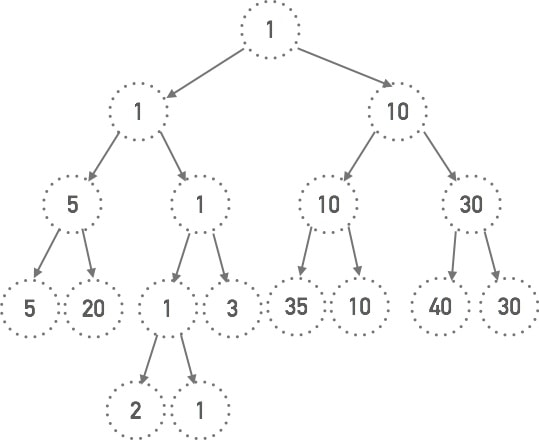


Some features of a tournament tree:

I. Root always has the MIN value since the winner is the smaller number between the two participants.

II. An ancestous node is always greater or equal to a descendent one. 

III. Based on II, we can tell that any nodes under the loser (root.right) of the final match (between root.left and root.right) will only be larger than or equal to loser. Since the loser (root.right.val) is greater than the winner (root.val), anything lower than the loser won’t be the second MIN value for sure. 
Loser by itself can be the potential second MIN value if the winner side of the subtree is empty or has large values. So take loser of root as a candidate for second MIN value and ignore the rest of the loser side tree.

IV. Having sorted out the loser side, now let’s look at the winner side (root.left in the example). Root.left by itself is a tournament tree with the same winner as the main tree. Based on III, any nodes under the loser side (root.left.left) of root.left will not be the second MIN. So take loser of root.left as a candidate for second MIN and ignore the rest of the loser side.
So we again look at the winner side (root.left.right) which by itself is a tournament tree with the same winner as root. Therefore the root node on its loser side is a candidate as the second MIN, or the second MIN could reside in the winner side that takes further searching to be found.

Now it is clear that the same pattern applies to any layer of the subtrees.

**Depth First Search** Recursive function findSecondMIN(root) applies to ONLY the winner side of every subtree. When the second MIN of the winner side tree is figured out, compare it with the loser’s value and return the smaller one between the two. That will be the 2nd MIN of the root.

**Base case:** when to stop searching? At any leaf node, there is no second MIN value for a tree with no descendent. In this case return positive infinity or NULL to tell the upper layer of recursion, do not select the result from this side of the tree.




## Play Cards
** google interview ** 

https://aonecode.com/getArticle/208

## Periodic String
**Google Interview String**


https://aonecode.com/getArticle/207

## Find Area of Room with Robot

**Facebook Interview Google Interview Graph DFS**

https://aonecode.com/getArticle/201

## Add / Multiply To Collection

** Google Interview Data Structure Design **

https://aonecode.com/getArticle/205

## Simulate rain
https://aonecode.com/getArticle/206

## Convert BST to Double Linked List
** Facebook Interview Yahoo Interview Tree DFS ** 


https://aonecode.com/getArticle/202

## Flatten Nested Linked List

** Facebook Interview Linked List Graph Recursion **

https://aonecode.com/getArticle/203


## Longest Arithmetic Progression
** Facebook Interview Dynamic Programming **

https://aonecode.com/getArticle/204